<a href="https://colab.research.google.com/github/Yutthana-Budjan/HW_ToolDataSci/blob/main/Project_IBM_HR_Analytics_Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Get Data
Download the data set from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Then that, save the downloaded data in `Google Drive`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_set = '/content/drive/MyDrive/Colab Notebooks/Data_Set/IBM_HR_Analytics_Employee_Attrition&Performance.csv'
df = pd.read_csv(data_set)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# 2. Data Cleansing

## 2.1 Check the Missing Value (Null)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The inspection revealed that the data set did not contain any missing values. But column (feature) : `EmployeeNumber` is deleted because it's the Employee_ID, which actually has no effect on the classification. And transform the data in column (feature) : `PercentSalaryHike` into the percentage format (float).

In [ ]:
# Delete column
df = df.drop('EmployeeNumber',axis=1)

# Transform Quantitative Data (integer --> float)
df['PercentSalaryHike'] = df['PercentSalaryHike'] * 0.01

## 2.2 Transform Data

### 2.2.1 Replace Value
For data with the ordinal scale or the nominal scale (binaly data),  such as the columns (feature) : `Attrition`, `Business Travel`, `Gender`, `Over18` and `OverTime`, the data is transformed by assigning new data values instead of the old data values.

In [ ]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].replace({'Travel_Frequently':2, 'Travel_Rarely': 1, 'Non-Travel': 0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Over18'] = df['Over18'].replace({'Y': 1, 'N': 0})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,Sales,2,3,Medical,1,4,...,4,80,0,17,3,2,9,6,0,8


### 2.2.2 One-Hot Encoding
For data with the nominal scale or categorical data, such as the columns (feature) : `Department`, `EducationField`, `JobRole` and `MaritalStatus`, Technique One-Hot Encoding is used to transform the data.

In [ ]:
df = pd.get_dummies(df,columns=['Department'], prefix='Department')
df = pd.get_dummies(df,columns=['EducationField'], prefix='EducationField')
df = pd.get_dummies(df,columns=['JobRole'], prefix='JobRole')
df = pd.get_dummies(df,columns=['MaritalStatus'], prefix='MaritalStatus')
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,1,1,40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,1,3,1,41,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,1,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,1,2,1,87,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,1,4,1,63,...,0,0,0,0,0,1,0,0,1,0


# 3. Data Analysis

## 3.1 Basic Statistics

In [ ]:
df.describe().round(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.0,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,0.16,1.09,802.49,9.19,2.91,1.0,2.72,0.60,65.89,...,0.18,0.07,0.1,0.05,0.2,0.22,0.06,0.22,0.46,0.32
std,9.14,0.37,0.53,403.51,8.11,1.02,0.0,1.09,0.49,20.33,...,0.38,0.25,0.3,0.23,0.4,0.42,0.23,0.42,0.50,0.47
min,18.00,0.00,0.00,102.00,1.00,1.00,1.0,1.00,0.00,30.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,1.00,465.00,2.00,2.00,1.0,2.00,0.00,48.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,36.00,0.00,1.00,802.00,7.00,3.00,1.0,3.00,1.00,66.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
75%,43.00,0.00,1.00,1157.00,14.00,4.00,1.0,4.00,1.00,83.75,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,1.00,1.00
max,60.00,1.00,2.00,1499.00,29.00,5.00,1.0,4.00,1.00,100.00,...,1.00,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00


## 3.2 Distribution of Data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'BusinessTravel'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
 

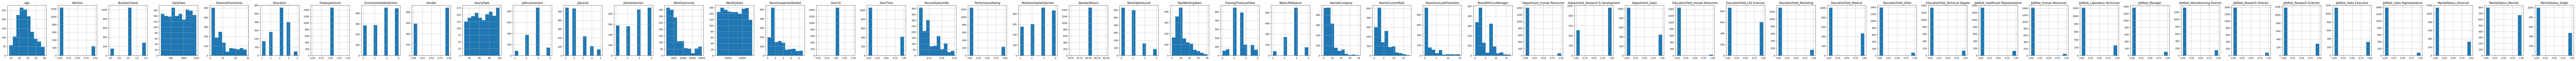

In [ ]:
col = df.columns.tolist()
df[col].hist(layout=(1, len(col)), figsize=(4*len(col), 4))

## 3.3 Correlation Values

In [ ]:
# Calculate the correlation between 'Attrition' (Class) and all features.
corr_matrix = df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel                       0.127006
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other              

When calculating the correlation between the class and all features, it was found that there were 3 features, namely `EmployeeCount`, `Over18` and `StandardHours`, whose correlation could not be calculated because all data values in each feature had the same value. It can be concluded that these variables have no relation to the classes. Therefore, these 3 features are deleted. Leave this data set.

In [ ]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,1,41,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,2,1,87,4,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,4,1,63,2,...,0,0,0,0,0,1,0,0,1,0


<Axes: >

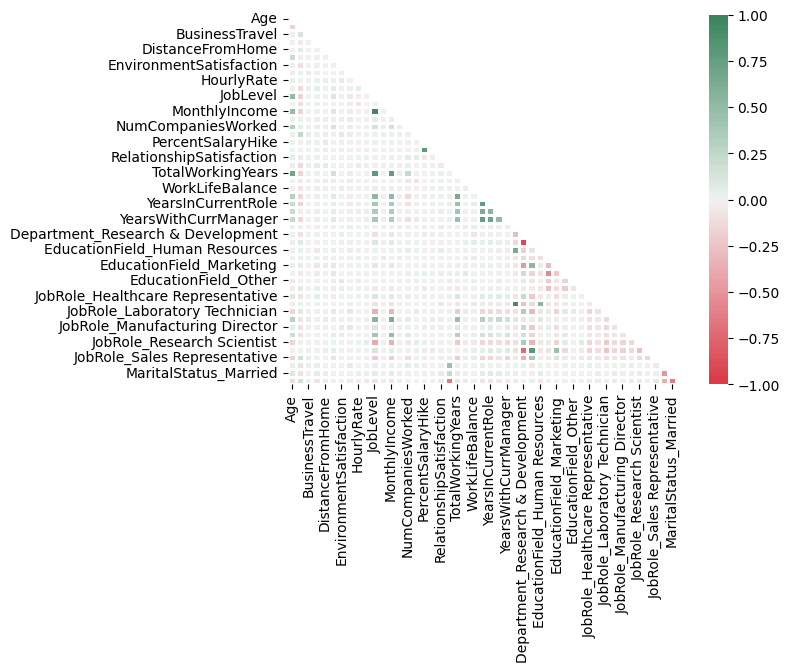

In [ ]:
# Visualize the correlation between the individual feature.
dcorr = df.corr()
mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), vmin=-1, vmax=1, center=0, linewidths=1, mask=mask)

## 3.4 Feature Importance
Use Algorithm `Random Forest` to calculate the score for each feature and find the most important features for the dataset.

In [ ]:
X = df.drop('Attrition',axis=1)
Y = df['Attrition']

from sklearn.ensemble import RandomForestClassifier
FI_modelRF = RandomForestClassifier().fit(X, Y)
FI = pd.Series(FI_modelRF.feature_importances_, index=X.columns).sort_values(ascending=False)
FI

MonthlyIncome                        0.066861
Age                                  0.056924
OverTime                             0.054102
DailyRate                            0.051842
MonthlyRate                          0.050370
TotalWorkingYears                    0.049758
DistanceFromHome                     0.046298
HourlyRate                           0.046097
YearsAtCompany                       0.044671
NumCompaniesWorked                   0.034062
PercentSalaryHike                    0.032185
YearsWithCurrManager                 0.031262
EnvironmentSatisfaction              0.029863
StockOptionLevel                     0.028647
JobSatisfaction                      0.026266
WorkLifeBalance                      0.025518
YearsSinceLastPromotion              0.025163
JobInvolvement                       0.024547
RelationshipSatisfaction             0.024292
YearsInCurrentRole                   0.024201
TrainingTimesLastYear                0.023117
JobLevel                          

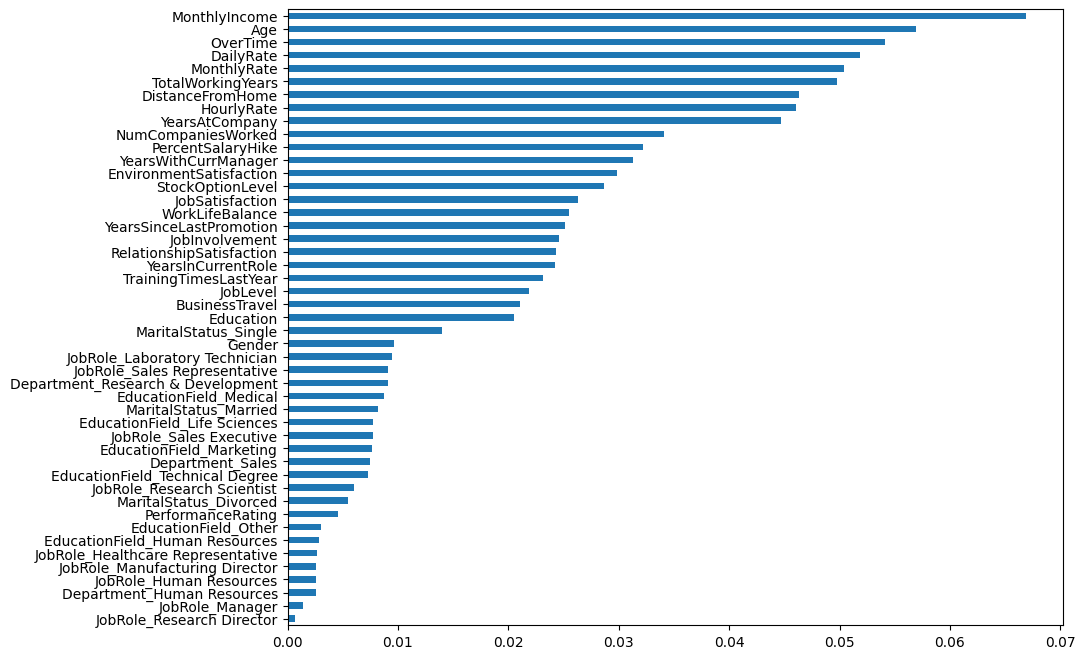

In [ ]:
# Visualize the Score of Feature Importance
fig, ax = plt.subplots(figsize=(10, 8))
FI.sort_values(ascending=True).plot(kind='barh', ax=ax)
plt.show()

## 3.5 Feature Extraction for Visualize Data
Use Algorithm `Principal Component Analysis (PCA)` to gain an overview of the data structure and relationships, focusing on the Principal Components most relevant to the dataset.

Explained variance ratio of PC1, PC2, PC3: [0.69475051 0.3030125  0.00222818]


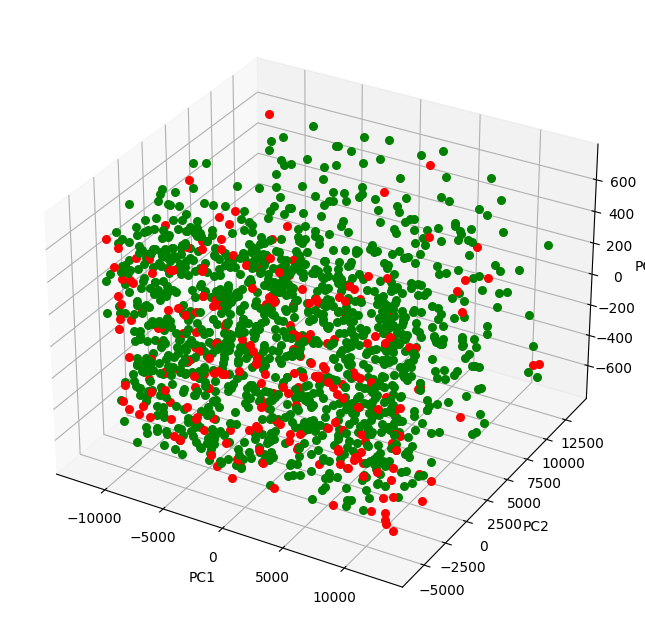

In [ ]:
X = df.drop('Attrition',axis=1)
Y = df['Attrition']

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of PC1, PC2, PC3:", explained_variance_ratio)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Class'] = df['Attrition']

# Visualize the PCA (3D)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {0: 'green', 1: 'red'}

for index, row in df_pca.iterrows():
    ax.scatter(row['PC1'], row['PC2'], row['PC3'], color=colors[row['Class']], s=30)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


Therefore, `PC1` (69.48%) is the best representative for the data structure in this dataset as it exhibits the highest level of correlation. Following that, `PC2` (30.30%) serves as the next best representative. Meanwhile, `PC3` (0.22%) has very low correlation, indicating its insignificance in explaining the data in this dataset.

# 4. Check the Balance of Class (Attrition)

# Number and Proportion compare each Class
   Number_of_Class  Proportion_of_Class
0             1233             0.838776
1              237             0.161224


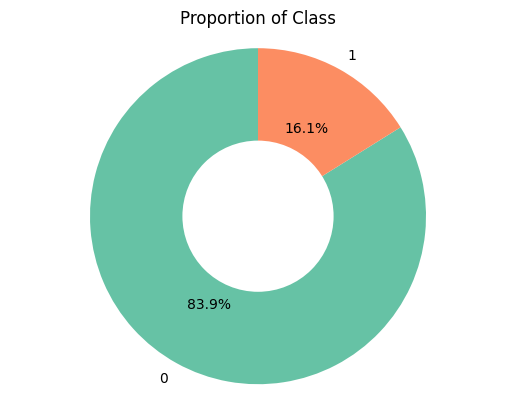

In [ ]:
# Created Table for represent Number and Proportion compare each Class
class_counts = df['Attrition'].value_counts()
check_balance_class = pd.DataFrame()
check_balance_class['Number_of_Class'] = df['Attrition'].value_counts()
check_balance_class['Proportion_of_Class'] = df['Attrition'].value_counts() / len(df)
print('# Number and Proportion compare each Class')
print(check_balance_class)

# Visualize the Proprotion of Class
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
centre_circle = plt.Circle((0,0),0.45,fc='white')
ax.add_patch(centre_circle)
ax.axis('equal')
sns.set_palette('pastel')
plt.title('Proportion of Class')
plt.show()

## 4.1 Solve the Problem of Class Imbalance

# Number and Proportion compare each Class (After Resampled)
   Number_of_Class  Proportion_of_Class
1             1233                  0.5
0             1233                  0.5


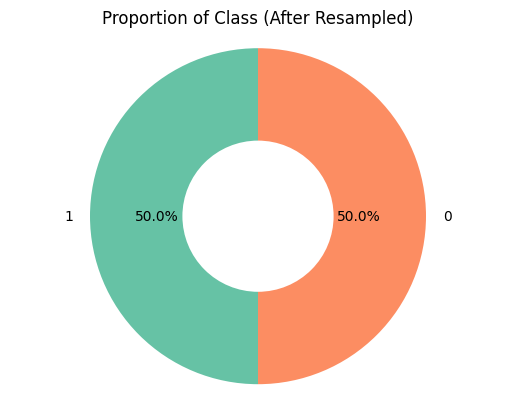

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop('Attrition',axis=1)
Y = df['Attrition']
smote = SMOTE(sampling_strategy='auto', random_state=44)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
df_resampled = pd.concat([X_resampled, Y_resampled], axis=1)

# Created Table for represent Number and Proportion compare each Class (After Resampled)
class_counts_resampled = df_resampled['Attrition'].value_counts()
check_balance_class_resampled = pd.DataFrame()
check_balance_class_resampled['Number_of_Class'] = df_resampled['Attrition'].value_counts()
check_balance_class_resampled['Proportion_of_Class'] = df_resampled['Attrition'].value_counts() / len(df_resampled)
print('# Number and Proportion compare each Class (After Resampled)')
print(check_balance_class_resampled)

# Visualize the Proprotion of Class (After Resampled)
fig, ax = plt.subplots()
ax.pie(class_counts_resampled, labels=class_counts_resampled.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
centre_circle = plt.Circle((0,0),0.45,fc='white')
ax.add_patch(centre_circle)
ax.axis('equal')
sns.set_palette('pastel')
plt.title('Proportion of Class (After Resampled)')
plt.show()

# 5. Data Modeling

## 5.1 Create Training Dataset & Test Dataset

In [ ]:
# Random Sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_resampled, test_size=0.3, random_state=44)

# Check the Proportion of Class (Attrition)
performance_train_set = pd.DataFrame()
performance_train_set['OverAll'] = df_resampled['Attrition'].value_counts() / len(df_resampled)
performance_train_set['RandomSampling'] = train_set['Attrition'].value_counts() / len(train_set)
performance_train_set['Random_%error'] = (performance_train_set['RandomSampling']-performance_train_set['OverAll']) / performance_train_set['OverAll']
performance_train_set

,OverAll,RandomSampling,Random_%error
1,0.5,0.501159,0.002317
0,0.5,0.498841,-0.002317


## 5.2 Training & Test Model
After splitting the dataset to train the model and test the model, The training dataset is used to train all 5 models, namely `Logistic Regression`, `Decision Tree`, `Random Forest`, `XG Boost` and `Naïve Bayes`, to find the model that best fits this dataset.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train = train_set.drop('Attrition',axis=1)
Y_train = train_set['Attrition']
X_test = test_set.drop('Attrition',axis=1)
Y_test = test_set['Attrition']



---


**5.2.1 Logistic Regression**

In [ ]:
model_logis = LogisticRegression().fit(X_train, Y_train)
Y_pred = model_logis.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[246 126]
 [112 256]]
              precision    recall  f1-score   support

           0     0.6872    0.6613    0.6740       372
           1     0.6702    0.6957    0.6827       368

    accuracy                         0.6784       740
   macro avg     0.6787    0.6785    0.6783       740
weighted avg     0.6787    0.6784    0.6783       740



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---


**5.2.2 Decision Tree**

In [ ]:
model_DT = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = model_DT.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[291  81]
 [ 51 317]]
              precision    recall  f1-score   support

           0     0.8509    0.7823    0.8151       372
           1     0.7965    0.8614    0.8277       368

    accuracy                         0.8216       740
   macro avg     0.8237    0.8218    0.8214       740
weighted avg     0.8238    0.8216    0.8214       740





---


**5.2.3 Random Forest**

In [ ]:
model_RF = RandomForestClassifier().fit(X_train, Y_train)
Y_pred = model_RF.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[356  16]
 [ 32 336]]
              precision    recall  f1-score   support

           0     0.9175    0.9570    0.9368       372
           1     0.9545    0.9130    0.9333       368

    accuracy                         0.9351       740
   macro avg     0.9360    0.9350    0.9351       740
weighted avg     0.9359    0.9351    0.9351       740





---


**5.2.4 XG Boost**

In [ ]:
model_XGB = XGBClassifier().fit(X_train, Y_train)
Y_pred = model_XGB.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[356  16]
 [ 39 329]]
              precision    recall  f1-score   support

           0     0.9013    0.9570    0.9283       372
           1     0.9536    0.8940    0.9229       368

    accuracy                         0.9257       740
   macro avg     0.9274    0.9255    0.9256       740
weighted avg     0.9273    0.9257    0.9256       740



---

**5.2.5 Naïve Bayes**


In [ ]:
model_GNB = GaussianNB().fit(X_train, Y_train)
Y_pred = model_GNB.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[244 128]
 [ 35 333]]
              precision    recall  f1-score   support

           0     0.8746    0.6559    0.7496       372
           1     0.7223    0.9049    0.8034       368

    accuracy                         0.7797       740
   macro avg     0.7984    0.7804    0.7765       740
weighted avg     0.7989    0.7797    0.7764       740





---

After training all 5 models, `Random Forest` proved to be the best fit to this dataset with an accuracy of 93.51%, followed by `XG Boost` with an accuracy of 92.57%

## 5.3 Hyperparameter Tuning
After training all 5 models without the hyperparameters tuning, it was found that the 2 most efficient algorithms for this dataset were `Random Forest` and `XG Boost`. Therefore, these 2 models were used to train the model with hyperparameter tuning using the `Bayesian Optimization` method

In [ ]:
!pip install scikit-optimize
!pip install scikit-learn
from skopt import BayesSearchCV
from skopt.space import Real, Integer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.9 MB/s eta 0:00:00


---


**5.3.1 Random Forest**

In [ ]:
param_space = {'n_estimators': Integer(100, 1000),
               'max_depth': Integer(10, 100),
               'min_samples_split': Real(0.01, 0.5, prior='uniform'),
               'min_samples_leaf': Integer(1, 10),
               'max_features': Real(0.1, 1.0, prior='uniform')}

opt = BayesSearchCV(RandomForestClassifier(), param_space, n_iter=50, cv=5, random_state=44)
opt.fit(X_train, Y_train)
print("Best Score: ", opt.best_score_)
print("Best Params: ", opt.best_params_)

Best Score:  0.9136701013655022
Best Params:  OrderedDict([('max_depth', 100), ('max_features', 0.4513164267525821), ('min_samples_leaf', 1), ('min_samples_split', 0.01), ('n_estimators', 1000)])


In [ ]:
parameter_RF = opt.best_params_
model_RF = RandomForestClassifier(**parameter_RF).fit(X_train, Y_train)
Y_pred = model_RF.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[352  20]
 [ 44 324]]
              precision    recall  f1-score   support

           0     0.8889    0.9462    0.9167       372
           1     0.9419    0.8804    0.9101       368

    accuracy                         0.9135       740
   macro avg     0.9154    0.9133    0.9134       740
weighted avg     0.9152    0.9135    0.9134       740



---


**5.3.2 XG Boost**

In [ ]:
param_space = {'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
                'gamma': Real(0.01, 1.0, prior='uniform'),
                'max_depth': Integer(1, 10),
                'n_estimators': Integer(100, 1000),
                'min_child_weight': Integer(1, 10)}

opt = BayesSearchCV(XGBClassifier(), param_space, n_iter=50, cv=5, random_state=44)
opt.fit(X_train, Y_train)
print("Best Score: ", opt.best_score_)
print("Best Params: ", opt.best_params_)

Best Score:  0.9246845941191253
Best Params:  OrderedDict([('gamma', 0.01), ('learning_rate', 0.027474985047066993), ('max_depth', 6), ('min_child_weight', 1), ('n_estimators', 1000)])


In [ ]:
parameter_XGB = opt.best_params_
model_XGB = XGBClassifier(**parameter_XGB).fit(X_train, Y_train)
Y_pred = model_XGB.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[355  17]
 [ 38 330]]
              precision    recall  f1-score   support

           0     0.9033    0.9543    0.9281       372
           1     0.9510    0.8967    0.9231       368

    accuracy                         0.9257       740
   macro avg     0.9272    0.9255    0.9256       740
weighted avg     0.9270    0.9257    0.9256       740



After training the 2 models with the hyperparameter tuning, it was found that `Random Forest` performed with an accuracy of 91.35% and `XG Boost` performed with an accuracy of 92.57%. The classification performance was `no different` or `worse` than when training the model without hyperparameter tuning.